<a href="https://colab.research.google.com/github/shubham5027/NLP-Internship-at-Suven-Consultants-Technology-Pvt-Ltd./blob/main/untiltled56.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
!pip install  emoji


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [10]:
import emoji

In [11]:
df1 = pd.read_csv("/content/emotion-labels-train.csv")
df2 = pd.read_csv("/content/emotion-labels-train.csv")
df3 = pd.read_csv("/content/emotion-labels-val.csv")

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3613 entries, 0 to 3612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3613 non-null   object
 1   label   3613 non-null   object
dtypes: object(2)
memory usage: 56.6+ KB


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3613 entries, 0 to 3612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3613 non-null   object
 1   label   3613 non-null   object
dtypes: object(2)
memory usage: 56.6+ KB


In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    347 non-null    object
 1   label   347 non-null    object
dtypes: object(2)
memory usage: 5.5+ KB


In [15]:
print("Number of NULL values in the training set: ")
print(df1.isnull().sum())
print("Number of NULL values in the test set: ")
print(df2.isnull().sum())
print("Number of NULL values in the validation set: ")
print(df3.isnull().sum())

Number of NULL values in the training set: 
text     0
label    0
dtype: int64
Number of NULL values in the test set: 
text     0
label    0
dtype: int64
Number of NULL values in the validation set: 
text     0
label    0
dtype: int64


In [16]:
df1.drop(df1[df1.duplicated()].index, axis=0, inplace=True)
df2.drop(df2[df2.duplicated()].index, axis=0, inplace=True)
df3.drop(df3[df3.duplicated()].index, axis=0, inplace=True)

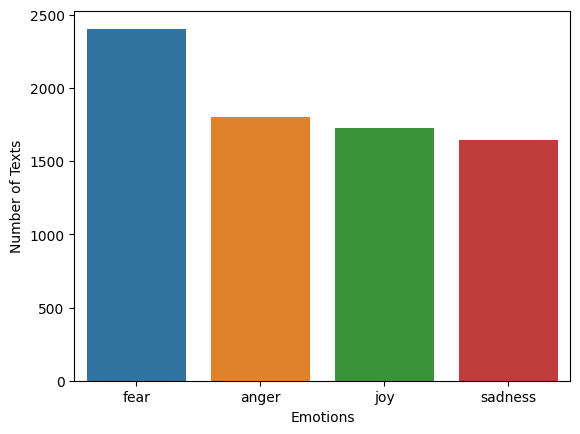

In [17]:
combined_df = pd.concat([df1, df2, df3])
label_counts = combined_df['label'].value_counts()

sns.countplot(x='label', data=combined_df, order=combined_df['label'].value_counts().index)
plt.xlabel('Emotions')
plt.ylabel('Number of Texts')
plt.show()

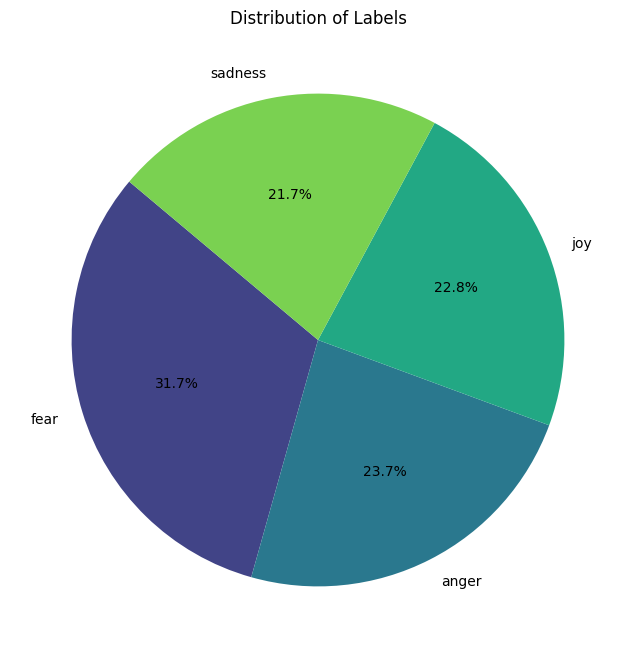

In [18]:
plt.figure(figsize=(8, 8))
plt.pie(combined_df['label'].value_counts().values, labels=combined_df['label'].value_counts().index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette('viridis', len(combined_df['label'].value_counts().index)))
plt.title('Distribution of Labels')
plt.show()

In [19]:
df1['text']= df1['text'].apply(lambda x: x.lower())
df2['text']= df2['text'].apply(lambda x: x.lower())
df3['text']= df3['text'].apply(lambda x: x.lower())

In [20]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# lemmatisation
def apply_lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# tokenisation
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Defining a function for token lemmatisation
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

In [22]:
def parse_emojis(text):


    emojis = [c for c in text if c in emoji.distinct_emoji_list(c)]


    emoji_names = [emoji.demojize(e) for e in emojis]

    parsed_emojis = ' '.join(emoji_names)

    return parsed_emojis

def remove_special_characters(text):

    text = re.sub(r'@\w+', '', text)

    #hashtag
    text = re.sub(r'#', ',', text)

    # Parsing emojis
    text = str(parse_emojis(text))

    text = re.sub(r'\d+', '', text)

    #HTML tags
    text = re.sub(r'<[^>]*>', '', text)

    # URLs
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)

    return text

In [23]:
df1['text'] = df1['text'].apply(remove_special_characters)
df2['text'] = df2['text'].apply(remove_special_characters)
df3['text'] = df3['text'].apply(remove_special_characters)

In [24]:
df1['text'] = df1['text'].apply(remove_stopwords)
df2['text'] = df2['text'].apply(remove_stopwords)
df3['text'] = df3['text'].apply(remove_stopwords)

In [25]:

def label_encode_dataframe(df):

    non_numeric_cols = df.select_dtypes(exclude=[int, float]).columns
    for col in non_numeric_cols:
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

    return df

df_num1 = label_encode_dataframe(df1)
df_num2 = label_encode_dataframe(df2)
df_num3 = label_encode_dataframe(df3)

In [26]:
X_train = df_num1["text"]
Y_train = df_num1['label']

X_test = df_num2["text"]
Y_test = df_num2['label']

X_val = df_num3["text"]
Y_val = df_num3['label']

In [27]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train.values.reshape(-1, 1))
X_test_scaled = scaler.fit_transform(X_test.values.reshape(-1, 1))
X_val_scaled = scaler.fit_transform(X_val.values.reshape(-1, 1))

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape, X_val.shape, Y_val.shape

((3613,), (3613,), (3613,), (3613,), (347,), (347,))

In [28]:
# Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_scaled, Y_train)
Y_val_pred = random_forest.predict(X_val_scaled)
acc_random_forest_val = accuracy_score(Y_val, Y_val_pred)
print("Random Forest (Validation): ", round(acc_random_forest_val * 100, 2))
Y_test_pred = random_forest.predict(X_test_scaled)
acc_random_forest_test = accuracy_score(Y_test, Y_test_pred)
print("Random Forest (Test): ", round(acc_random_forest_test * 100, 2))

Random Forest (Validation):  31.41
Random Forest (Test):  36.65


In [29]:
# Gaussian Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, Y_train)
Y_val_pred = naive_bayes.predict(X_val_scaled)
acc_naive_bayes_val = accuracy_score(Y_val, Y_val_pred)
print("Gaussian Naive Bayes (Validation): ", round(acc_naive_bayes_val * 100, 2))
Y_test_pred = naive_bayes.predict(X_test_scaled)
acc_naive_bayes_test = accuracy_score(Y_test, Y_test_pred)
print("Gaussian Naive Bayes (Test): ", round(acc_naive_bayes_test * 100, 2))

Gaussian Naive Bayes (Validation):  31.7
Gaussian Naive Bayes (Test):  31.75
